# Data Analysis: K-means for destination clustering

## This notebook:
1. clusters destinations based on popularity (bikes received) by events
2. backtracks the cutpoints of cluster labels (**THIS SECTION IS CURRENTLY LOST DUE TO CORRUPTED FILE**)

In [2]:
import pandas as pd
import geopandas as gpd
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Yuwen/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
df = pd.read_csv('subset_records_800m_Basketball.csv')
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time,E_Time,TripStartHM,EventEndHM
0,0,397,21:51:17,21:57:54,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,365,Fulton St & Grand Ave,...,Subscriber,1970.0,1,2016-01-01,2016-01-01,NaN,2017-12-06 21:18:00,21:18:00,21.850000,21.3
1,1,492,22:10:10,22:18:22,397,Fulton St & Clermont Ave,40.684157,-73.969223,354,Emerson Pl & Myrtle Ave,...,Subscriber,1988.0,2,2016-01-01,2016-01-01,NaN,2017-12-06 21:18:00,21:18:00,22.166667,21.3
2,2,465,22:10:31,22:18:16,397,Fulton St & Clermont Ave,40.684157,-73.969223,354,Emerson Pl & Myrtle Ave,...,Subscriber,1989.0,1,2016-01-01,2016-01-01,NaN,2017-12-06 21:18:00,21:18:00,22.166667,21.3
3,3,218,21:06:04,21:09:42,416,Cumberland St & Lafayette Ave,40.687534,-73.972652,399,Lafayette Ave & St James Pl,...,Subscriber,1986.0,1,2016-01-02,2016-01-02,basketball,2016-01-02 21:00:00,21:00:00,21.100000,21.0
4,4,638,21:06:16,21:16:54,416,Cumberland St & Lafayette Ave,40.687534,-73.972652,3222,Hanson Pl & St Felix St,...,Subscriber,1974.0,1,2016-01-02,2016-01-02,basketball,2016-01-02 21:00:00,21:00:00,21.100000,21.0


In [4]:
df.keys()

Index(['Unnamed: 0', 'tripduration', 'starttime', 'stoptime',
       'start station id', 'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'startdate', 'stopdate', 'Event_type',
       'End_Time', 'E_Time', 'TripStartHM', 'EventEndHM'],
      dtype='object')

In [8]:
df = df[df['Event_type'] == 'basketball']
X = df[['end station latitude', 'end station longitude']]
dd = pd.DataFrame(X.groupby(['end station latitude','end station longitude']).size())
dd.reset_index(inplace=True)
dd.rename(columns={0:'count'},inplace=True)
dd.head()

,end station latitude,end station longitude,count
0,40.661063,-73.979453,6
1,40.663779,-73.983968,4
2,40.666208,-73.981999,3
3,40.666287,-73.988951,5
4,40.666318,-73.985462,4


In [9]:
dd.to_csv('count_basketball.csv')

In [73]:
from sklearn.cluster import KMeans

# number of clusters
n=4

# train the model
km = KMeans(random_state=324, n_clusters=n)
res = km.fit(np.array(dd['count']).reshape(-1, 1))

print(res.labels_)

[2 2 0 2 2 2 2 0 0 0 0 1 2 2 2 0 2 2 3 2 1 1 1 0 2 3 0 2 0 2 0 2 2 1 2 0 2
 2 0 0 1 2 3 0 2 1 0 0 1 2 2 1 2 0 2 2 0 3 0 0 2 2 0 0 1 0 3 2 2 0 1 3 1 0
 2 0 1 2 1 1 0 1 2 0 1 2 0 2 1 1 2 2 0 0 1 1 0 0 2 2 2 0 0 2 0 2 2 0 0 2 0
 0 0 0 2 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0]


In [52]:
nyc = gpd.read_file('nycd/geo_export_2f574bf8-c85e-442d-b2c6-2b06c5956290.shp')
nyc.head()

,shape_leng,shape_area,boro_cd,geometry
0,51549.557886,1.031778e+08,311.0,POLYGON ((-73.97299433938896 40.60881414180224...
1,65821.999543,8.819584e+07,313.0,POLYGON ((-73.98372152615246 40.59582107821707...
2,52245.830489,9.952550e+07,312.0,POLYGON ((-73.97139631688152 40.64825778611409...
3,37008.100406,5.666322e+07,304.0,POLYGON ((-73.89646625062909 40.68233642247531...
4,62239.832144,1.142663e+08,209.0,"POLYGON ((-73.83979488496 40.8356192074919, -7..."


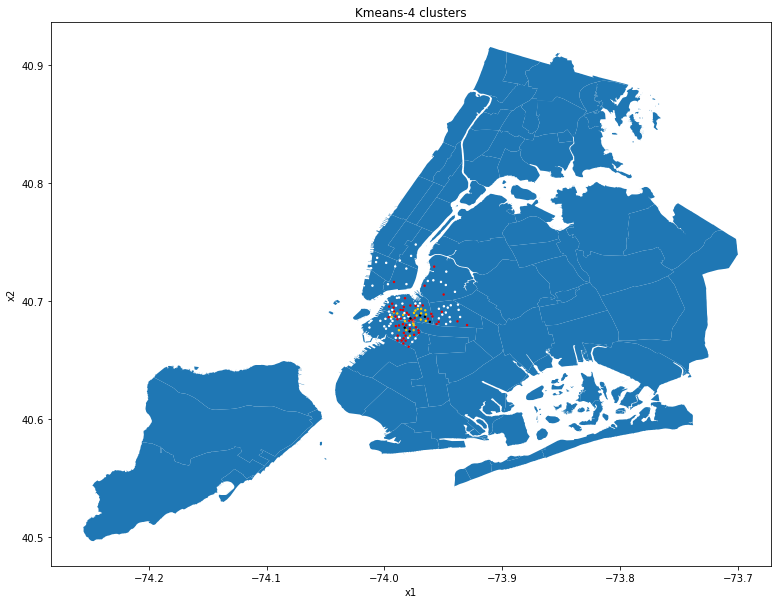

In [74]:
#plt.figure(figsize=(20,10))
ax = nyc.plot(figsize=(20,10))
plt.scatter(dd['end station longitude'], dd['end station latitude'], c=res.labels_, cmap='hot_r', axes=ax, s=2)
plt.scatter(-73.975961, 40.683048, marker='*', c='indianred', s=4)
plt.xlabel('x1')
plt.ylabel('x2')

#plt.xlim(-74.1,-73.9)
plt.title('Kmeans-{} clusters'.format(n))
plt.savefig('km1_basketball.png',dpi=400)
plt.show()